In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


food_data = pd.read_csv(r'https://raw.githubusercontent.com/CrestwoodPrep/Vera-Unit-6/main/food_coded.csv')
#print(food_data.columns)  

food_data_used = food_data[["GPA", "Gender", "cook", "grade_level", "income", "eating_out", "weight", "pay_meal_out"]]

food_data_used.head()

,GPA,Gender,cook,grade_level,income,eating_out,weight,pay_meal_out
0,2.4,2,2.0,2,5.0,3,187,2
1,3.654,1,3.0,4,4.0,2,155,4
2,3.3,1,1.0,3,6.0,2,I'm not answering this.,3
3,3.2,1,2.0,4,6.0,2,"Not sure, 240",2
4,3.5,1,1.0,4,6.0,2,190,4


46 [2.4, 3.8, 3.4, 3.1, 3.6, 2.2, 3.3, 3.87, 3.7, 3.7, 3.7, 3.0, 3.2, 3.5, 4.0, 3.0, 3.4, 3.8, 2.8, 3.5, 3.83, 3.6, 3.3, 3.3, 3.292, 3.5, 3.8, 3.9, 3.1, 3.79, 3.1, 3.9, 3.2, 3.5, 3.68, 3.3, 3.2, 3.75, 3.5, 3.92, 3.9, 2.9, 2.8, 3.3, 3.2, 3.0]
46 [187.0, 180.0, 264.0, 185.0, 170.0, 165.0, 175.0, 195.0, 185.0, 185.0, 160.0, 175.0, 180.0, 167.0, 205.0, 175.0, 140.0, 168.0, 145.0, 155.0, 150.0, 169.0, 185.0, 200.0, 265.0, 165.0, 175.0, 210.0, 140.0, 200.0, 200.0, 145.0, 155.0, 175.0, 260.0, 190.0, 165.0, 175.0, 184.0, 210.0, 185.0, 170.0, 138.0, 150.0, 185.0, 135.0]


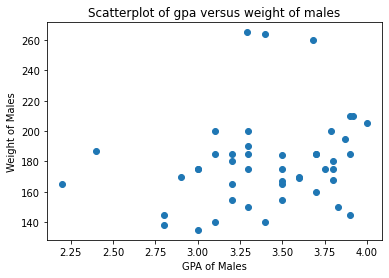

In [ ]:
gpa_weight_data = food_data_used[["GPA", "weight", "Gender"]]
male_gpa_weight_data = gpa_weight_data[gpa_weight_data["Gender"] == 2] 

male_gpa_weight_data[["GPA", "weight"]]
male_gpa_weight_data_removed_NaN = male_gpa_weight_data.dropna()

male_gpa_list = male_gpa_weight_data_removed_NaN["GPA"].tolist()
male_weight_list = male_gpa_weight_data_removed_NaN["weight"].astype(float).tolist()

for index in range(len(male_gpa_list)):
  if "bitch" in male_gpa_list[index]:
    male_gpa_list[index] = male_gpa_list[index][:4]
  male_gpa_list[index] = float(male_gpa_list[index])
  
print(len(male_gpa_list), male_gpa_list)
print(len(male_weight_list), male_weight_list)

plt.scatter(male_gpa_list, male_weight_list)
plt.xlabel('GPA of Males')
plt.ylabel('Weight of Males')
plt.title('Scatterplot of gpa versus weight of males')
plt.show()

#It appears that as male's weight increases, their gpa increases

70
70


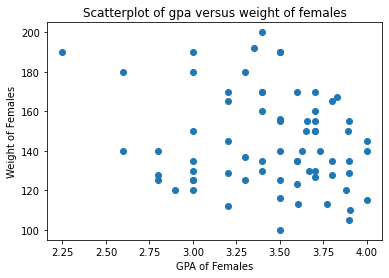

In [ ]:
female_gpa_weight_data = gpa_weight_data[gpa_weight_data["Gender"] == 1] 

female_gpa_weight_data[["GPA", "weight"]]
female_gpa_weight_data_removed_NaN = female_gpa_weight_data.dropna()

female_gpa_list = female_gpa_weight_data_removed_NaN["GPA"].tolist()
female_weight_list = female_gpa_weight_data_removed_NaN["weight"].tolist()

cleaned_female_gpa_list = []
cleaned_female_weight_list = []
for index in range(len(female_gpa_list)):
  try:
    gpa_float = float(female_gpa_list[index])
    weight_float = float(female_weight_list[index])
    cleaned_female_gpa_list.append(gpa_float)
    cleaned_female_weight_list.append(weight_float)
  except:
    continue

print(len(cleaned_female_gpa_list))
print(len(cleaned_female_weight_list))

plt.scatter(cleaned_female_gpa_list, cleaned_female_weight_list)
plt.xlabel('GPA of Females')
plt.ylabel('Weight of Females')
plt.title('Scatterplot of gpa versus weight of females')
plt.show()

#It appears that as female's weight increases, their gpa decreases

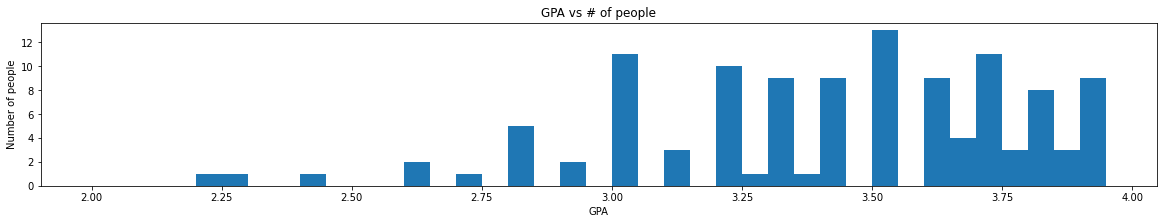

In [ ]:
gpa_data = food_data_used["GPA"]
gpa_as_list = gpa_data.tolist()

#print(gpa_as_list)
#print(np.arange(2.0, 4.0, 0.1))

cleaned_list = []

for value in gpa_as_list:
  if value == "Personal ":
    continue
  if value == "Unknown":
    continue
  elif type(value) == type(1.0):
    continue
  elif "bitch" in value:
    cleaned_list.append(float(value[:4]))
  else:
    cleaned_list.append(float(value))

plt.figure(figsize=(20, 3))
bin_edges = np.arange(2.0, 4.0, 0.05)
#print(bin_edges)
plt.hist(cleaned_list, bin_edges)
plt.xlabel('GPA')
plt.ylabel('Number of people')
plt.title('GPA vs # of people')
plt.show() 

#From this graph, we see that most people who are doing this study have a 
#GPA greater than 3.00 and there's a few less than 3.00.
#We can hence assume that people who have such a high GPA actually had the time
#to actually do this survey and people who had gpas lower than 2.00 weren't
#allowed into the study or didn't have an opporunity to enter it

Text(0.5, 1.0, 'Number of people with how much money they are willing to spent for takeout ')

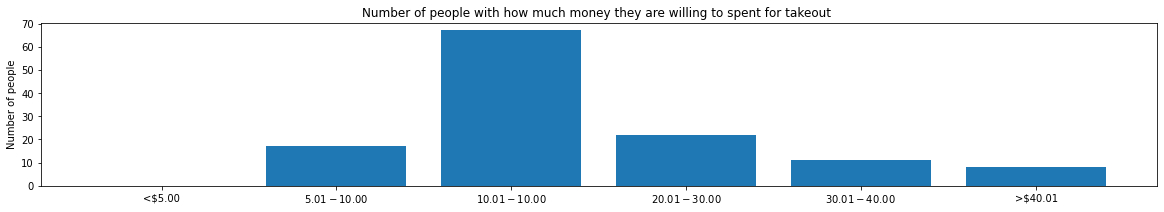

In [ ]:
pay_meal_out = food_data_used["pay_meal_out"]
pay_meal_out_as_list = pay_meal_out.tolist()

#pay_meal_out_students=food_data_used[["pay_meal_out"]]

#1 - up to $5.00  <-not present
#2 - $5.01 to $10.00 
#3 - $10.01 to $10.00
#4 - $20.01 to $30.00 
#5 - $30.01 to $40.00 
#6 - more than $40.01 

objects = ('<$5.00', '$5.01-$10.00', '$10.01-$20.00', 
           '$20.01-$30.00 ', '$30.01-$40.00 ', '>$40.01')
y_pos = np.arange(len(objects))
y_values = [len(food_data_used[food_data_used["pay_meal_out"] == 1]),
               len(food_data_used[food_data_used["pay_meal_out"] == 2]),
               len(food_data_used[food_data_used["pay_meal_out"] == 3]),
               len(food_data_used[food_data_used["pay_meal_out"] == 4]),
               len(food_data_used[food_data_used["pay_meal_out"] == 5]),
               len(food_data_used[food_data_used["pay_meal_out"] == 6])]

## give x and y values, where x should be categorical
plt.figure(figsize=(20, 3))
plt.bar(y_pos, y_values , align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of people')
plt.title('Number of people with how much money they are willing to spent for takeout ')


#From the bar graph, we see that about 
#out of /125 people
#no 1 spent less than $5
#17 people willing to spent about 5-10
#67 people willing to spent about 10-20
#22 people willing to spent about 20-30
#11 people willing to spent about 30-40
#8 people willing to spent beyond 40

#From this data, we can assume college students are most likely willing to pay $10-20
#for a takeout meal and very few people are willing to go beyond $40
#We can also people don't have an opporunity to spend less than $5 on takeout

[0, 17, 67, 22, 11, 8]


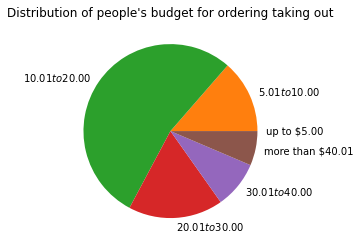

In [ ]:
number_of_individuals_with_choice_1 = len(food_data_used[food_data_used["pay_meal_out"] == 1])
number_of_individuals_with_choice_2 = len(food_data_used[food_data_used["pay_meal_out"] == 2])
number_of_individuals_with_choice_3 = len(food_data_used[food_data_used["pay_meal_out"] == 3])
number_of_individuals_with_choice_4 = len(food_data_used[food_data_used["pay_meal_out"] == 4])
number_of_individuals_with_choice_5 = len(food_data_used[food_data_used["pay_meal_out"] == 5])
number_of_individuals_with_choice_6 = len(food_data_used[food_data_used["pay_meal_out"] == 6])

pie_chart_data = [number_of_individuals_with_choice_1, number_of_individuals_with_choice_2, 
                  number_of_individuals_with_choice_3, number_of_individuals_with_choice_4,
                  number_of_individuals_with_choice_5, number_of_individuals_with_choice_6]

print(pie_chart_data)

plt.title("Distribution of people\'s budget for ordering taking out")
plt.pie(pie_chart_data, labels = ["up to $5.00", "$5.01 to $10.00", 
                                  "$10.01 to $20.00", "$20.01 to $30.00",
                                  "$30.01 to $40.00", "more than $40.01"])
plt.show() 


#1 - up to $5.00  <-not present
#2 - $5.01 to $10.00 
#3 - $10.01 to $20.00 
#4 - $20.01 to $30.00 
#5 - $30.01 to $40.00 
#6 - more than $40.01 

#From this graph, we see that about people spent $10-$20 on take out meals out of everyone
#No people spent on take out between $0-$5

0
7
0
5
0
2
0
3


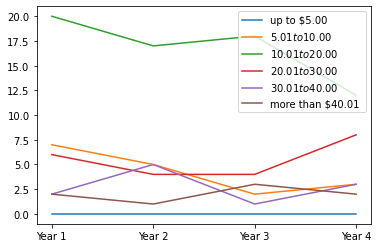

In [ ]:
food_data_grade_level_and_pay_meal_out = food_data_used[["grade_level", "pay_meal_out"]]
food_data_grade_level_and_pay_meal_out.head()

year_one_data = food_data_grade_level_and_pay_meal_out[food_data_grade_level_and_pay_meal_out["grade_level"] == 1]

print(len(year_one_data[year_one_data["pay_meal_out"]==1]))
print(len(year_one_data[year_one_data["pay_meal_out"]==2]))

year_two_data = food_data_grade_level_and_pay_meal_out[food_data_grade_level_and_pay_meal_out["grade_level"] == 2]

print(len(year_two_data[year_two_data["pay_meal_out"]==1]))
print(len(year_two_data[year_two_data["pay_meal_out"]==2]))

year_three_data = food_data_grade_level_and_pay_meal_out[food_data_grade_level_and_pay_meal_out["grade_level"] == 3]

print(len(year_three_data[year_three_data["pay_meal_out"]==1]))
print(len(year_three_data[year_three_data["pay_meal_out"]==2]))

year_four_data = food_data_grade_level_and_pay_meal_out[food_data_grade_level_and_pay_meal_out["grade_level"] == 4]

print(len(year_four_data[year_four_data["pay_meal_out"]==1]))
print(len(year_four_data[year_four_data["pay_meal_out"]==2]))


#year_one_data

data_for_pay_meal_out_one = [len(year_one_data[year_one_data["pay_meal_out"]==1]), 
     len(year_two_data[year_two_data["pay_meal_out"]==1]),
     len(year_three_data[year_three_data["pay_meal_out"]==1]), 
     len(year_four_data[year_four_data["pay_meal_out"]==1])]

data_for_pay_meal_out_two = [len(year_one_data[year_one_data["pay_meal_out"]==2]), 
     len(year_two_data[year_two_data["pay_meal_out"]==2]),
     len(year_three_data[year_three_data["pay_meal_out"]==2]), 
     len(year_four_data[year_four_data["pay_meal_out"]==2])]

data_for_pay_meal_out_three = [len(year_one_data[year_one_data["pay_meal_out"]==3]), 
     len(year_two_data[year_two_data["pay_meal_out"]==3]),
     len(year_three_data[year_three_data["pay_meal_out"]==3]), 
     len(year_four_data[year_four_data["pay_meal_out"]==3])]

data_for_pay_meal_out_four = [len(year_one_data[year_one_data["pay_meal_out"]==4]), 
     len(year_two_data[year_two_data["pay_meal_out"]==4]),
     len(year_three_data[year_three_data["pay_meal_out"]==4]), 
     len(year_four_data[year_four_data["pay_meal_out"]==4])]

data_for_pay_meal_out_five = [len(year_one_data[year_one_data["pay_meal_out"]==5]), 
     len(year_two_data[year_two_data["pay_meal_out"]==5]),
     len(year_three_data[year_three_data["pay_meal_out"]==5]), 
     len(year_four_data[year_four_data["pay_meal_out"]==5])]

data_for_pay_meal_out_six = [len(year_one_data[year_one_data["pay_meal_out"]==6]), 
     len(year_two_data[year_two_data["pay_meal_out"]==6]),
     len(year_three_data[year_three_data["pay_meal_out"]==6]), 
     len(year_four_data[year_four_data["pay_meal_out"]==6])]


plt.xticks([0, 1, 2, 3], ['Year 1', 'Year 2', 'Year 3', "Year 4"]) 
plt.plot(data_for_pay_meal_out_one, label='up to $5.00')
plt.plot(data_for_pay_meal_out_two, label='$5.01 to $10.00 ')
plt.plot(data_for_pay_meal_out_three, label='$10.01 to $20.00 ')
plt.plot(data_for_pay_meal_out_four, label='$20.01 to $30.00')
plt.plot(data_for_pay_meal_out_five, label='$30.01 to $40.00 ')
plt.plot(data_for_pay_meal_out_six, label='more than $40.01 ')
plt.legend()
plt.show()

#From the line graph.
#For 1st->2nd year 
#There's a decrease in number of people who is willing to budget their previous amount. 
#The exception is 30-40 range which has shown an increase. This may because some students
#previous had good spending habits and is now able to afford a better lifestyle or 2nd year got too busy for some students

#Going from 2nd year->3rd year
#Most students decreased again, but there is an increase in people who are willing
#to spend a budget of 10-20 to 30-40. 
#This may be due to some students want to cut back due to their spendings in first year
#Or they are busy to cook

#Going from 3rd year->4th year
#There is a massive dip in people who are willing to spend 10-20 and a massive increase in 20-30.
#I believe some sigificiant amount of students are trying to enjoy the last year
#of college by spending their remaining money on takeout or need take out more
#due to 4th year's stress
